> # Important things to know about Guassian Elimination:
In the Guassian elimination for solving systems of linear equations, specific row operations are used to transform the matrix into an upper triangular form or row echelon form.

These operations are fundamental to the process and are designed to preserve the system's solution.

### __Permissible Row Operations__
1. __Swapping Rows:__ You can interchange towo rows. This operations doesn't change the solution set of the system.
2. __Multiplying a Row by a Non-zero Scaler:__ Any row can be multiplied by a non-zero constant.This operation changes the scale of the equation but not its solutions.
3. __Adding a Multiple of One Row to Another:__ You can add or subtract a mltiple of one row to another row. This operation is used to create zeros in specific positions under the pivot elements.

### __Operations Not Permissible__
- __Multiplying or Adding Rows with Columns:__ Operations involving both rows and columns simultaneously are not allowed, as they would change the nature of the systems.
- __Multiplying a Row by Zero:__ This operation is not allowed as it leads to loss of information from the equation, potentially changing the solution set.
- __Changing the Number of Rows or Columns:__ Any operation that alters the dimentions of the matrix (like adding or removing a row or column) is not permissible, as it would change the underlying systems of equations.

### __Importance of Following Permissible Operations__
The key purpose of these operation in Guassian elimination is to systematically simplify the matrix while ensuring that the transformed matrix represents a systems of equivalent to the original.This means that the operations should neither alter and the solution set nor  introduce any new solutions.Adhering to the permissible gurantees that the integrity of the system is maintained throughout the process.

---

### __Eigen-Vector__
Eigen-Vector is transformed matrix in which size will changed but the direction will remain same.

### __Eigen-Values:__ 
The values of Eigen-Vector will be Eigen-Values.

__Example:__ if we have a matrix   [2  0]

                           [0 3]

so the base on the Basis vector  [2]   is Eigen Vector and the `2` and `3` are Eigen Values.

                             [3]

---

> ### __SVD Implementation in Python__


In [1]:
import pandas as pd
import seaborn as sns 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the datset 
titanic_df = sns.load_dataset('titanic')

In [2]:
titanic_df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Process the data
# Selecting features for SVD
features = ['pclass', 'sex', 'age', 'fare', 'survived']

# pipeline for numerical features 
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# pipeline for categorical features
categorical_features = ['pclass', 'sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Applying preprocesing to the dataset
x = preprocessor.fit_transform(titanic_df[features])
   

In [7]:
# perform SVD
svd = TruncatedSVD(n_components=4) # you can adjust n_components
y = svd.fit_transform(x)

print(f"Singular Values: {svd.singular_values_}")
print(f"Explained Variance Ratio: {svd.explained_variance_ratio_}")


Singular Values: [34.0919237  29.83381513 28.43241553 18.6007055 ]
Explained Variance Ratio: [0.37544109 0.16349524 0.21253133 0.12019999]


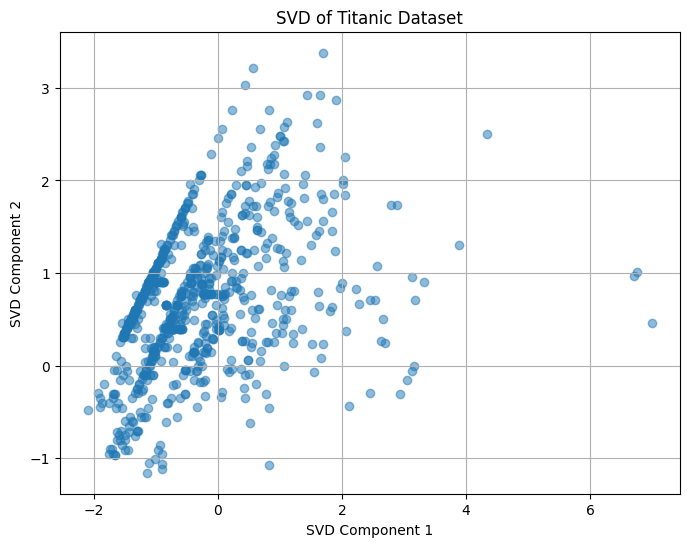

In [11]:
import matplotlib.pyplot as plt

# Assuming Y is the result fro SVD with 2 components
plt.figure(figsize=(8, 6))
plt.scatter(y[:, 0], y[:, 1], alpha=0.5)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("SVD of Titanic Dataset")
plt.grid(True)
plt.show()

c:\Users\Computer Valley\.conda\envs\DS_Env\Lib\site-packages\matplotlib\collections.py:1112: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


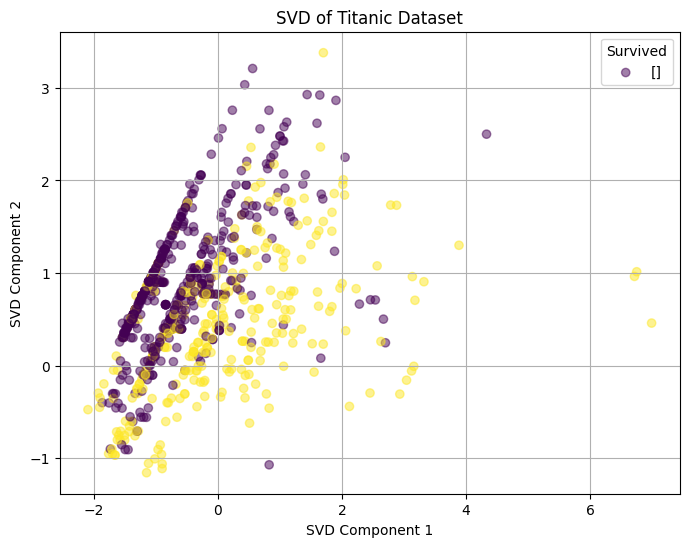

In [12]:
# Assuming  'Survived' is the last column of our selected features
categories = titanic_df['survived'].values # Extract the survival status

plt.figure(figsize=(8, 6))
plt.scatter(y[:, 0], y[:, 1], alpha=0.5, c=categories)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("SVD of Titanic Dataset")
plt.grid(True)
plt.legend(scatter.legend_elements(), title='Survived')
plt.show()

---

> # Interpretation

Interpreting the results of an SVD analysis, particularly when applied to a dataset like the Titanic, involves understanding how the original features are represented in the reduced dimensionality space. Here's how you might interpret the results:

### __1. Distribution of Data Points:__

- __Scatter Plot:__ The scatter plot you created shows how each passenger’s data is represented in the two-dimensional space formed by the first two principal components from the SVD.
- Clusters: If there are any noticeable clusters, they might indicate groups of passengers with similar characteristics.

### __2. Singular Values and Explained Variance:__

- __Singular Values:__ These values give you an idea of the importance or 'weight' of each component. Higher singular values indicate that the corresponding component captures more of the data's variance.
- __Explained Variance Ratio:__ This tells you the proportion of the dataset’s total variance that is captured by each component. If the first few components capture a high percentage of the variance, it suggests that they represent the data well.

### __3. Components and Original Features:__

- __Understanding Components:__ Each component in SVD is a linear combination of the original features (like age, fare, class). By looking at the composition of these components, you can sometimes infer what combination of original features is most significant in explaining the variance in the dataset.

### __4. Categorical Variable (e.g., Survival Status):__

- __Color Coding (if used):__ By coloring points based on survival status (or another categorical variable), you can see if there's a pattern or separation between different categories in the reduced space.
- __Pattern Interpretation:__ For instance, if survivors and non-survivors are distinctly separated in the plot, it might suggest that the components you’ve derived correlate in some way with survival.

> # Important Considerations:

- __Complex Interpretation:__ The interpretation of SVD components can be more abstract and less intuitive than other methods like Principal Component Analysis (PCA), especially since SVD doesn't necessarily order components by the amount of variance they capture.

- __Contextual Understanding:__ The interpretation heavily depends on the context of your data and your understanding of the domain. For the Titanic dataset, knowledge about features like class, age, and fare in the context of survival can guide your interpretation.

- __Data Preprocessing:__ The way you preprocess the data (handling missing values, scaling, encoding categorical variables) can greatly influence the outcome and hence your interpretation.

---

Overall, interpreting SVD results requires both a technical understanding of the method and a contextual understanding of the data. It’s often a combination of observing patterns, relating them back to the original features and the real-world context they represent.
